# Relatorio - 1
#### _Nome_: *Nicolas Enzo Yassuda*

Este relatório visa entender qual é o ganho e como funciona o HPC (High Performance Computing) em relação a um computador comum. Para isso, foi utilizado o problema de multiplicação de matrizes, que é um problema que pode ser paralelizado praticamente 100%. Isso será executado no cluster franky.

In [14]:
from IPython.display import display
import pandas as pd

data = {
    'Numero de Iteracoes': [30, 50, 100],
    'CPU+': [1.75763, 2.80953, 5.61431],
    'CPU++': [1.73669, 3.04458, 5.71788],
    'MEM+': [1.72681, 2.86752, 6.97594],
    'CPU+/MEM+': [1.68811, 2.80953, 5.71788],
    'Buffado': [0.463854, 0.755096, 1.53368],
    'limitado': [1.73023,  2.87232, 7.53666],
    }

df = pd.DataFrame(data)
display(df)
data2 = {
    'CPU+': ['CPU:2 per task, MEM:512MB'],
    'CPU++': ['CPU:4 per task, MEM:512MB'],
    'MEM+': ['CPU:1 per task, MEM:1GB'],
    'CPU+/MEM+': ['CPU:2 per task, MEM:1GB'],
    'Buffado':['CPU:4 per task, MEM:1GB'],
    'limitado':['CPU:1 per task, MEM:512MB']
    }
df2 = pd.DataFrame(data2)
display(df2)


,Numero de Iteracoes,CPU+,CPU++,MEM+,CPU+/MEM+,Buffado,limitado
0,30,1.75763,1.73669,1.72681,1.68811,0.463854,1.73023
1,50,2.80953,3.04458,2.86752,2.80953,0.755096,2.87232
2,100,5.61431,5.71788,6.97594,5.71788,1.533680,7.53666


,CPU+,CPU++,MEM+,CPU+/MEM+,Buffado,limitado
0,"CPU:2 per task, MEM:512MB","CPU:4 per task, MEM:512MB","CPU:1 per task, MEM:1GB","CPU:2 per task, MEM:1GB","CPU:4 per task, MEM:1GB","CPU:1 per task, MEM:512MB"


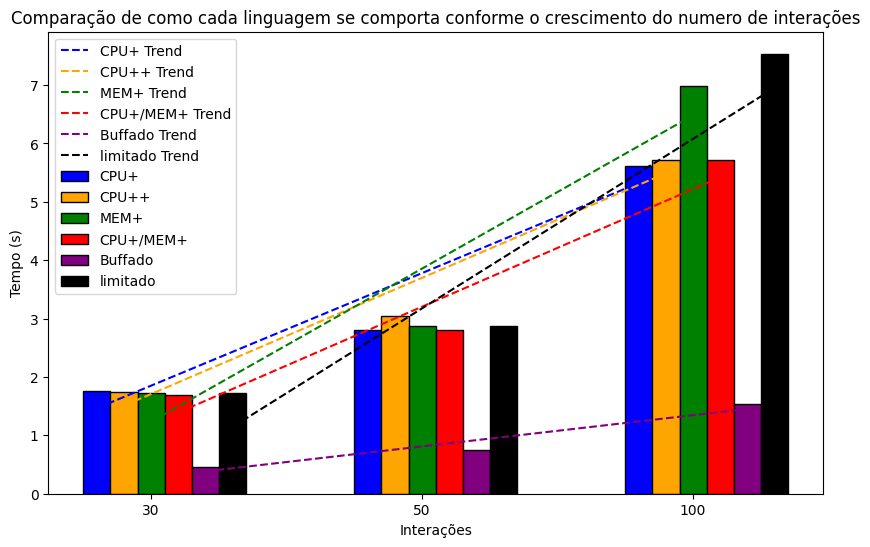

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the x-axis labels
x_labels = df['Numero de Iteracoes']

# Set the data for each language
cpuplus_complexity = df['CPU+']
cpuplusplus_complexity = df['CPU++']
memplus_complexity = df['MEM+']
cpumemup_complexity = df['CPU+/MEM+']
buffado_complexity = df['Buffado']
limitado_complexity = df['limitado']

# Set the width of the bars
bar_width = 0.1

# Set the positions of the bars on the x-axis
r1 = range(len(x_labels))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]
r6 = [x + bar_width for x in r5]

# Plot the bars
plt.bar(r1, cpuplus_complexity, color='blue', width=bar_width, edgecolor='black', label='CPU+')
plt.bar(r2, cpuplusplus_complexity, color='orange', width=bar_width, edgecolor='black', label='CPU++')
plt.bar(r3, memplus_complexity, color='green', width=bar_width, edgecolor='black', label='MEM+')
plt.bar(r4, cpumemup_complexity, color='red', width=bar_width, edgecolor='black', label='CPU+/MEM+')
plt.bar(r5, buffado_complexity, color='purple', width=bar_width, edgecolor='black', label='Buffado')
plt.bar(r6, limitado_complexity, color='black', width=bar_width, edgecolor='black', label='limitado')


# Function to plot trend lines
def plot_trend_line(x, y, color, label):
    z = np.polyfit(x, y, 1)  # Linear fit
    p = np.poly1d(z)
    plt.plot(x, p(x), linestyle='--', color=color, label=label + ' Trend')

# Trend lines for each dataset
plot_trend_line(r1, cpuplus_complexity, 'blue', 'CPU+')
plot_trend_line(r2, cpuplusplus_complexity, 'orange', 'CPU++')
plot_trend_line(r3, memplus_complexity, 'green', 'MEM+')
plot_trend_line(r4, cpumemup_complexity, 'red', 'CPU+/MEM+')
plot_trend_line(r5, buffado_complexity, 'purple', 'Buffado')
plot_trend_line(r6, limitado_complexity, 'black', 'limitado')


# Add labels and title
plt.xlabel('Interações')
plt.ylabel('Tempo (s)')
plt.title('Comparação de como cada linguagem se comporta conforme o crescimento do numero de interações')

# Adjust x-axis tick labels
plt.xticks([r + 2 * bar_width for r in range(len(x_labels))], x_labels)

# Add a legend
plt.legend()

# Show the plot
plt.show()


- Podemos ver que em muitas situações a variação de apenas um dos recursos causa uma pequena variação no tempo de execução. Isso ocorre pois o tempo de execução é influenciado por diversos fatores, como a quantidade de processos rodando no cluster, memoria e processador disponível porem, em geral ao aumentar o numero de processadores temos um problema de overhead, que é o tempo que o processador leva para dividir o problema em partes menores e depois juntar as partes menores em um resultado final. Já quando aliamos um aumento de processadores com um aumento de memoria, temos um ganho significativo, pois o overhead é compensado pelo aumento de memoria disponível.
    

O comando sinfo mostra o estado das partições do cluster.

O comando squeue mostra o estado das filas do cluster.

O comando sprio mostra a prioridade dos jobs.

O comando srun executa um job sendo diferente do sbatch que submete um job, trazendo assim a possibilidade de vermos o terminal da execução.

O comando sstat mostra o estado de um job.

O comando strigger cria um trigger para ser acionado quando determinada ação foi efetuada no seu job como por exemplo o tempo de execução dele estar acabando.